<a href="https://colab.research.google.com/github/ankitchaahat/time_sereis/blob/main/AR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error


import warnings
warnings.filterwarnings('ignore')



In [12]:
data=pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'],index_col=['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


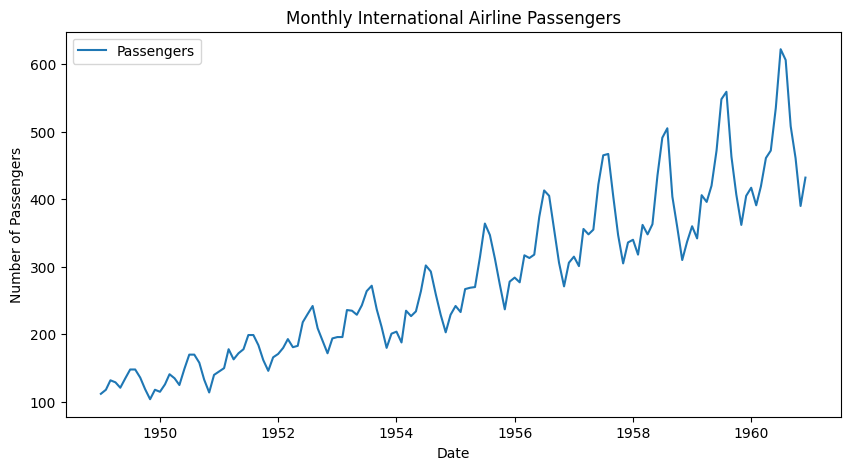

In [13]:
# plotting the time series

plt.figure(figsize=(10,5))
plt.plot(data,label='Passengers')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [14]:
# handle missing values

# check missing values

data.isnull().sum()

#Passengers    0
dtype: int64

In [15]:
# if there is any missing value we can fill up using interpolation

data=data.interpolate()
print(data.isnull().sum())

#Passengers    0
dtype: int64


In [17]:
print(data.columns)

Index(['#Passengers'], dtype='object')


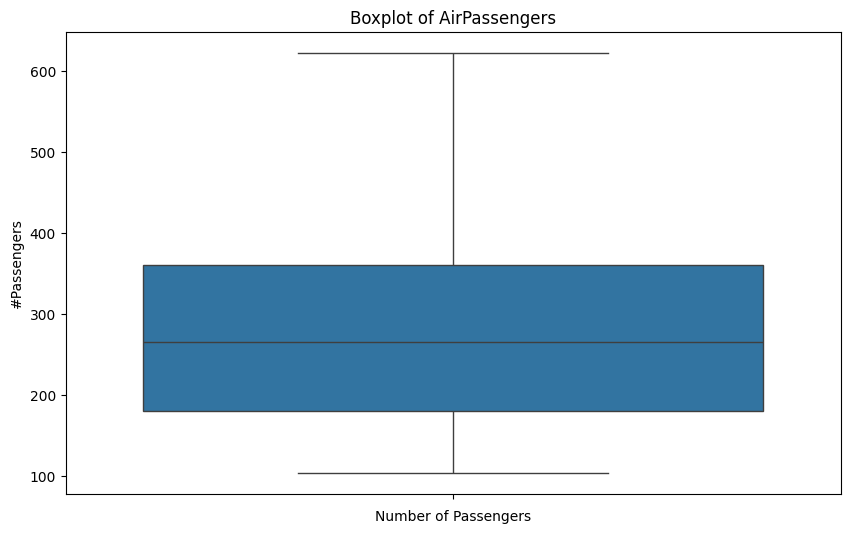

In [18]:
# outlier detection and visualization'
#we will use box plot to detect the outliers

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['#Passengers'])
plt.title('Boxplot of AirPassengers')
plt.xlabel('Number of Passengers')
plt.show()


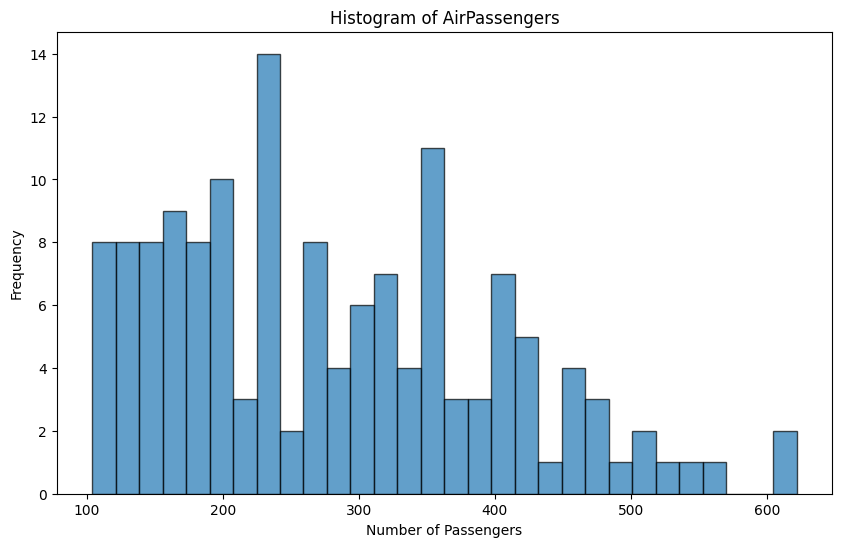

In [19]:
# pllotting histogram

# Histogram plot
plt.figure(figsize=(10, 6))
plt.hist(data['#Passengers'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of AirPassengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()


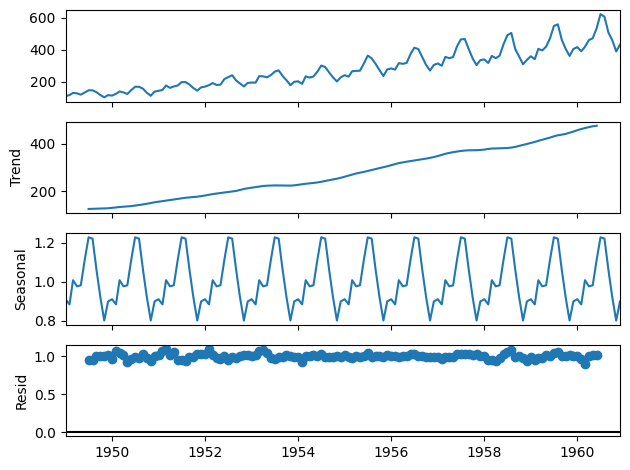

In [20]:
#  Time Series Decomposition
# We can decompose the time series into trend, seasonal, and residual components

# Decompose the time series
result = seasonal_decompose(data, model='multiplicative')

# Plot the decomposed components
result.plot()
plt.show()


In [26]:
#  Stationarity Tests

#  Augmented Dickey-Fuller (ADF) Test
# ADF test
adf_result = adfuller(data['#Passengers'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1%, -3.4816817173418295
Critical Values:
   5%, -2.8840418343195267
Critical Values:
   10%, -2.578770059171598


The ADF statistic (-3.456) is less than the 5% critical value (-2.890) and 10% critical value (-2.580), but not less than the 1% critical value (-3.500).
The p-value (0.012) is less than 0.05.

In [28]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
# KPSS test
kpss_result = kpss(data['#Passengers'])
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
for key, value in kpss_result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 1.6513122354165206
p-value: 0.01
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


Lambda value for Box-Cox transformation: 0.14802265137037945


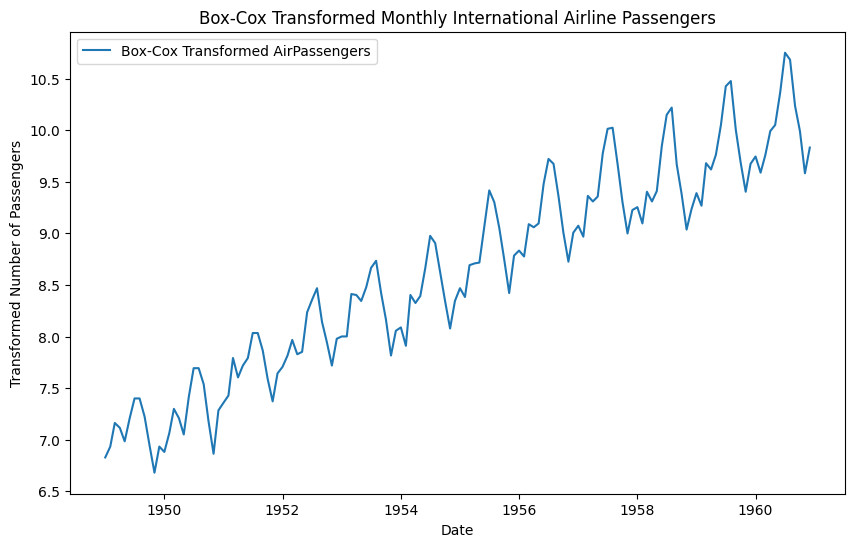

In [29]:
# Apply Box-Cox transformation
data['Passengers_boxcox'], lam = boxcox(data['#Passengers'])
print('Lambda value for Box-Cox transformation:', lam)

# Plot the transformed data
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers_boxcox'], label='Box-Cox Transformed AirPassengers')
plt.title('Box-Cox Transformed Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Transformed Number of Passengers')
plt.legend()
plt.show()


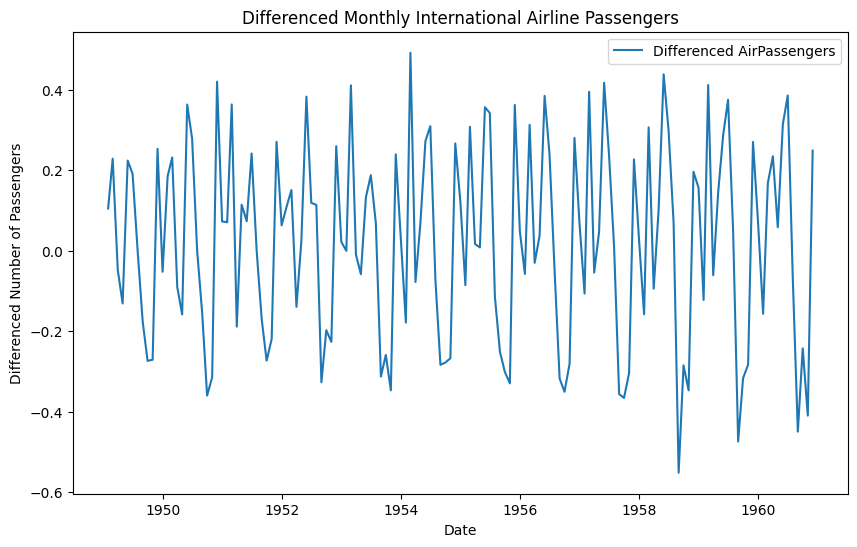

In [30]:
# Apply differencing to remove trend
data['Passengers_diff'] = data['Passengers_boxcox'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers_diff'], label='Differenced AirPassengers')
plt.title('Differenced Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Differenced Number of Passengers')
plt.legend()
plt.show()


In [31]:
# ADF test on differenced data
adf_result_diff = adfuller(data['Passengers_diff'].dropna())
print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value:', adf_result_diff[1])
for key, value in adf_result_diff[4].items():
    print('Critical Values (Differenced):')
    print(f'   {key}, {value}')

# KPSS test on differenced data
kpss_result_diff = kpss(data['Passengers_diff'].dropna())
print('KPSS Statistic (Differenced):', kpss_result_diff[0])
print('p-value:', kpss_result_diff[1])
for key, value in kpss_result_diff[3].items():
    print('Critical Values (Differenced):')
    print(f'   {key}, {value}')


ADF Statistic (Differenced): -2.8717075283173994
p-value: 0.04873833392661749
Critical Values (Differenced):
   1%, -3.4825006939887997
Critical Values (Differenced):
   5%, -2.884397984161377
Critical Values (Differenced):
   10%, -2.578960197753906
KPSS Statistic (Differenced): 0.032190781891374524
p-value: 0.1
Critical Values (Differenced):
   10%, 0.347
Critical Values (Differenced):
   5%, 0.463
Critical Values (Differenced):
   2.5%, 0.574
Critical Values (Differenced):
   1%, 0.739


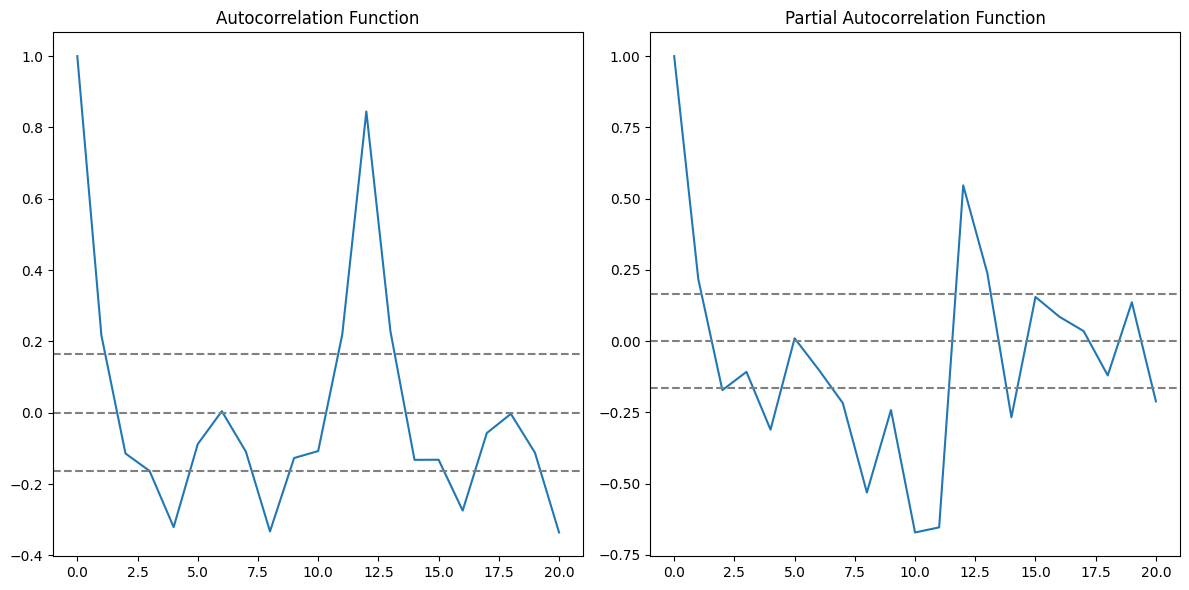

In [32]:
# ACF and PACF plots
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(acf(data['Passengers_diff'].dropna(), nlags=20))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data['Passengers_diff'].dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['Passengers_diff'].dropna())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf(data['Passengers_diff'].dropna(), nlags=20))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data['Passengers_diff'].dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['Passengers_diff'].dropna())), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [33]:
# Fit AR model
model = AutoReg(data['Passengers_diff'].dropna(), lags=1)
model_fit = model.fit()
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:        Passengers_diff   No. Observations:                  143
Model:                     AutoReg(1)   Log Likelihood                   2.144
Method:               Conditional MLE   S.D. of innovations              0.238
Date:                Sun, 21 Jul 2024   AIC                              1.711
Time:                        05:09:37   BIC                             10.579
Sample:                    03-01-1949   HQIC                             5.315
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0162      0.020      0.807      0.420      -0.023       0.056
Passengers_diff.L1     0.2182      0.082      2.657      0.008       0.057       0.379
                    

In [34]:
# Train-test split
train_size = int(len(data) * 0.8)
train, test = data['Passengers_diff'][:train_size], data['Passengers_diff'][train_size:]

# Fit AR model on training data
model = AutoReg(train.dropna(), lags=1)
model_fit = model.fit()


In [35]:
# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)


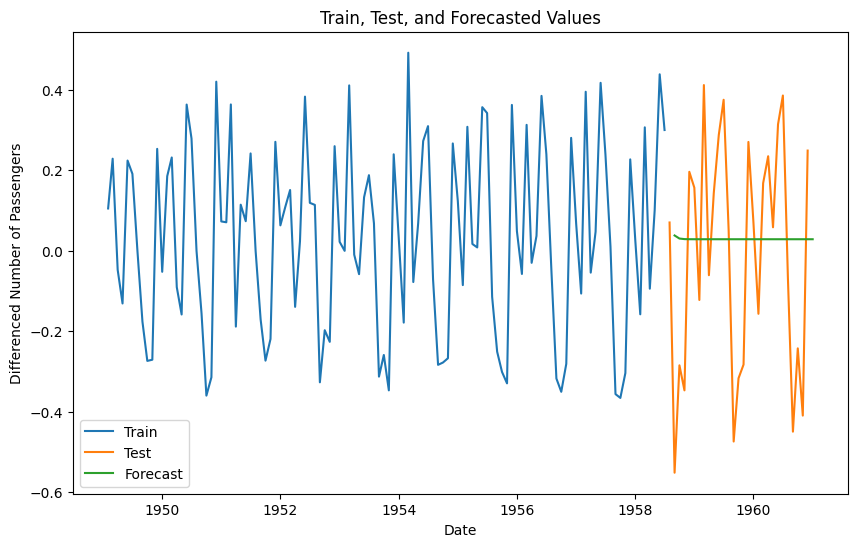

In [36]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Forecast')
plt.title('Train, Test, and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Differenced Number of Passengers')
plt.legend()
plt.show()


In [37]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
mape = mean_absolute_percentage_error(test, predictions)
print('Mean Absolute Percentage Error:', mape)


Root Mean Squared Error: 0.287146213125584
Mean Absolute Percentage Error: 0.9517822402668291


RMSE: 0.287 - This means that the average error of your model's predictions is 0.287 units. This gives you an idea of the scale of the prediction errors in the same units as the data.



MAPE: 95.18% - This means that the average prediction error is about 95.18% of the actual values. This indicates that the model’s predictions are off by a large percentage, suggesting that the model may not be very accurate.